<a href="https://www.kaggle.com/code/swekerr/stable-diffusion-v-1-5?scriptVersionId=182080823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install diffusers -q

In [2]:
!pip install --upgrade transformers -q

In [3]:
!nvidia-smi

Fri Jun  7 16:27:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch

device = 'cuda'

generator = torch.Generator(device).manual_seed(1024)

In [5]:
#from huggingface_hub import notebook_login
#notebook_login()

In [6]:
model_id = "runwayml/stable-diffusion-v1-5"

In [7]:
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-06-07 16:27:51.647730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 16:27:51.647864: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 16:27:51.787215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_

In [8]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16", use_auth_token=False)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': False} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

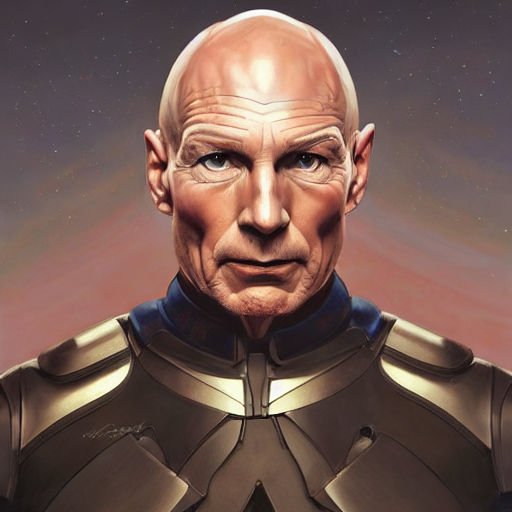

In [9]:
prompt = "Symmetry!! portrait of Captain Picard, warrior in sci-fi armour, tech wear, muscular!! Glowing lights!! sci-fi, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha"
image = pipe(prompt).images[0]  
    
image.save("sd_img.png")

image

  0%|          | 0/50 [00:00<?, ?it/s]

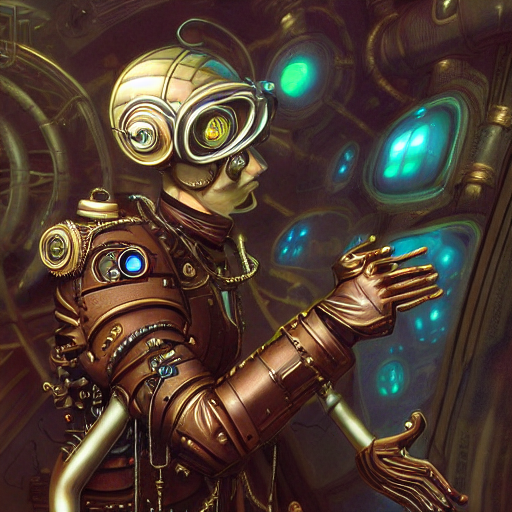

In [10]:
prompt = "A whirlwind inside the steampunk metaverse, man, male, engineer, hologram, half body, sports goggles, android, cyborg, steampunk face, by loish, D&D, fantasy, intricate, elegant, highly detailed, colorful, digital painting, artstation, concept art, art by artgerm and greg rutkowski and alphonse mucha."
image = pipe(prompt).images[0]  
    
image.save("sd_img.png")

image

  0%|          | 0/50 [00:00<?, ?it/s]

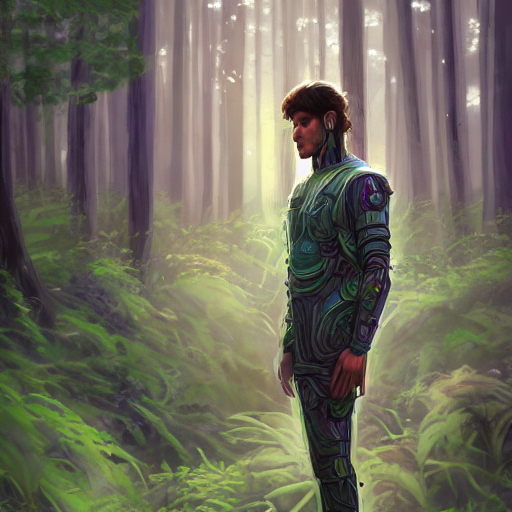

In [11]:
prompt = "An AI engineer working in a serene forest, man, male, engineer, hologram, full body, neural interface, android, cybernetic, serene face, by loish, D&D, nature, intricate, elegant, highly detailed, colorful, digital painting, artstation, concept art, art by Leornado Da Vinci"
image = pipe(prompt).images[0]  
    
image.save("sd_img.png")

image